<a href="https://colab.research.google.com/github/dmejiaho/Parciales/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [ ]:
#Estas son todas las librerias utilizadas a lo largo de la resolucion de cada punto.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import sympy as sym

## Punto b.

Para este punto se tenia una señal con senos y cosenos, y con una frecuencia de muestreo (Fs) de 5kHz, relizando la simulación para poder graficarla se obtuvo el siguiente resultado:

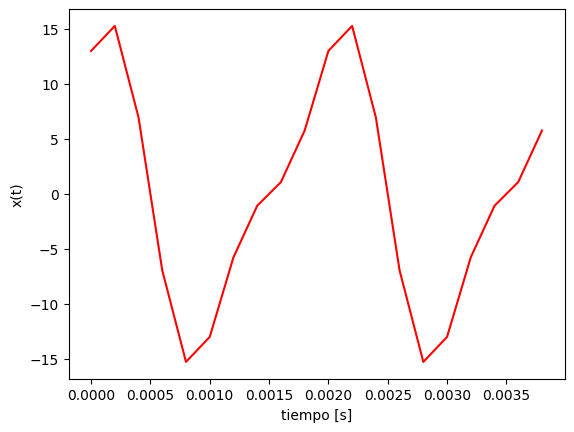

In [ ]:
# En este caso se definen algunas constantes y parametros
A=3       # Amplitud de la primera señal
B=5       # Amplitud de la segunda señal
C=10      # Amplitud de la tercera señal
t1=1/500  # Periodo de la primera señal
t2=1/1000 # Periodo de la segunda señal
t3=1/5500 # Periodo de la tercera señal
ti=0      # Tiempo inicial
fs=5000   # Frecuencia de muestreo dada en el enunciado
T=1/500   # Periodo de muestreo

# Definicion del tiempo final basado en el periodo de muestreo
tf = 2 * T

# Creacion de un vector de tiempo con un intervalo de muestreo definido
tv = np.arange(ti, tf, 1/fs)

# Generacion de la señal dada en el enunciado
xv=A*np.cos(1000*np.pi*tv)+B*np.sin(2000*np.pi*tv)+C*np.cos(11000*np.pi*tv)

# Visualizacion de la señal en el dominio del tiempo
plt.plot(tv, xv, "r")   # Graficar la señal xv
plt.xlabel('tiempo [s]') # Etiqueta del eje x
plt.ylabel('x(t)')       # Etiqueta del eje y
plt.show()               # Mostrar la gráfica


Como se puede apreciar la señal no se ve nada bien y no se puede observar el comportamiento de esta, por lo que realizandolo a papel se confirmó que la frecuencia de muestreo debia ser mayor o igual a 11000, entonces utilizando esta frecuencia de muestreo se observó lo siguiente:

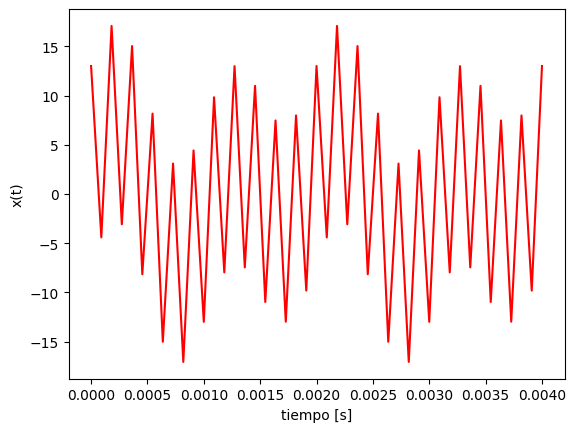

In [ ]:
#Se realiza lo mismo que con el caso anterior
# Definicion de constantes y parametros
A=3       # Amplitud de la primera señal
B=5       # Amplitud de la segunda señal
C=10      # Amplitud de la tercera señal
F1=500    # Frecuencia de la primera señal
F2=1000   # Frecuencia de la segunda señal
F3=5500   # Frecuencia de la tercera señal
ti=0      # Tiempo inicial
fs=11000  # se cambia la frecuencia de muestreo a la calculada en papel
T=1/500   # Periodo de muestreo

# Definicion del tiempo final basado en el periodo de muestreo
tf=2*T

# Creacion de un vector de tiempo con un intervalo de muestreo definido
tv = np.arange(ti,tf,1/fs)

# Generacion de la señal dada en el enunciado
xv = A*np.cos(2*np.pi*F1*tv) + B*np.sin(2*np.pi*F2*tv)+C*np.cos(2*np.pi*F3*tv)

# Visualizacion de la señal xv
plt.plot(tv, xv, "r")   # Graficar la señal xv
plt.xlabel('tiempo [s]') # Etiqueta del eje x
plt.ylabel('x(t)')       # Etiqueta del eje y
plt.show()               # Mostrar la gráfica


Aunque en el caso anterior se persive una mayor claridad del comportamiento de la señal, se ven ciertos picos que no deberian verse, por lo que aumentamos la primera frecuencia en 15, esto es solo un ejemplo la idea es que la frecuencia de muestreo fuera mucho más que 11kHz, observando la señal de mejor manera.

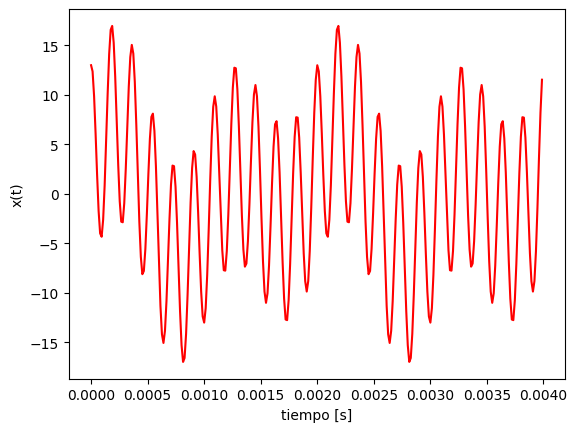

In [ ]:
#Se realiza lo mismo que en los casos anteriores
# Definicion de constantes y parametros
A=3       # Amplitud de la primera señal
B=5       # Amplitud de la segunda señal
C=10      # Amplitud de la tercera señal
F1=500    # Frecuencia de la primera señal
F2=1000   # Frecuencia de la segunda señal
F3=5500   # Frecuencia de la tercera señal
ti=0      # Tiempo inicial
fs=15*5000  # se cambia la frecuencia de muestreo pues la calculada en papel no mostraba una señal de forma tan adecuada y debia ser mucho mayor
T=1/500   # Periodo de muestreo

# Definicion del tiempo final basado en el periodo de muestreo
tf=2*T

# Creacion de un vector de tiempo con un intervalo de muestreo definido
tv = np.arange(ti,tf,1/fs)

# Generacion de la señal dada en el enunciado
xv = A*np.cos(2*np.pi*F1*tv) + B*np.sin(2*np.pi*F2*tv)+C*np.cos(2*np.pi*F3*tv)

# Visualizacion de la señal xv
plt.plot(tv, xv, "r")   # Graficar la señal xv
plt.xlabel('tiempo [s]') # Etiqueta del eje x
plt.ylabel('x(t)')       # Etiqueta del eje y
plt.show()               # Mostrar la gráfica


## Punto c.

<ipython-input-57-46a74290b976>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1, 1), ve))]


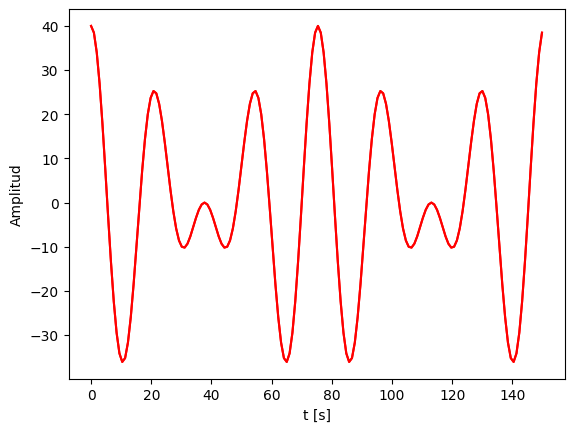

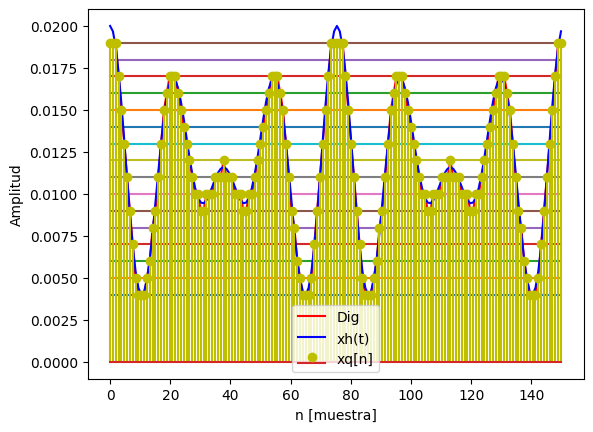

In [ ]:
def my_ceropend(x, xhmax=0.020, xhmin=0.004):
    '''
    Funcion para cuantizar una señal linealmente entre dos valores especificos.

    Argumentos:
        x: arreglo con la señal de entrada
        xhmax: valor maximo deseado después de la cuantizacion
        xhmin: valor minimo deseado después de la cuantizacion

    Retorna:
        xh: señal cuantizada
    '''
    # Cálculo de la pendiente y el intercepto de la recta que pasa por (x.min(), xhmin) y (x.max(), xhmax)
    m = (xhmax - xhmin) / (x.max() - x.min())
    b = xhmin - m * x.min()

    # Cuantizacion lineal de la señal
    xh = m * x + b

    return xh

# Definición de parametros y la señal dada
T1 = 6 * np.pi
T2 = 8 * np.pi
F1 = 1 / T1
F2 = 1 / T2
T = 24 * np.pi
Fs = 20 * max(F1, F2)
ti = 0
tf = 2 * T
tv = np.arange(0, tf, 1 / Fs)
x = 20 * (np.cos(tv / 3) + np.cos(tv / 4))
xhmax = 0.020
xhmin = 0.004

# Cuantizacion de la señal dada
xh = my_ceropend(x, xhmax, xhmin).reshape(-1, 1)

nbits = 4  # número bits
Ne = 2 ** nbits  # cantidad de estados en este caso 2
res = (xhmax - xhmin) / Ne  # resolucion cuantizacion
ve = np.arange(xhmin, xhmax, res).reshape(-1, 1)  # vector de estados

xq = np.zeros(len(xh))  # señal cuantizada
for i in range(len(xh)):
    # se cálcula la distancia desde cada punto al vector de estados y se selecciona el estado mas cercano
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1, 1), ve))]

# Graficas de señales
plt.plot(tv, x, "r")
plt.plot(tv, x, "r")
plt.xlabel("t [s]")
plt.ylabel("Amplitud")
plt.show()

for v in ve:
    plt.plot(tv, v * np.ones(len(tv)))  #Señal digital

plt.plot(tv, xq, "r", label="Dig")
plt.plot(tv, xh, "b", label="xh(t)")
plt.stem(tv, xq, "y", label="xq[n]")
plt.xlabel("n [muestra]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


In [ ]:
# Respuesta
he = np.array([2, 4, 1, 5, 0, 10])  # Definición de la respuesta al escalón del sistema, donde cada elemento representa la salida del sistema después de aplicar un escalón unitario en la entrada.

# Cálculo de la respuesta al impulso del sistema a partir de la respuesta al escalon
h = np.diff(he)  # Diferencia entre elementos consecutivos de la respuesta al escalon, lo que nos da la respuesta al impulso del sistema.
# La respuesta al impulso se realiza diferemciando, ya que el escalon es la integral del impulso

# Mostrar vector de la respuesta impulso
print(h)


[ 2 -3  4 -5 10]


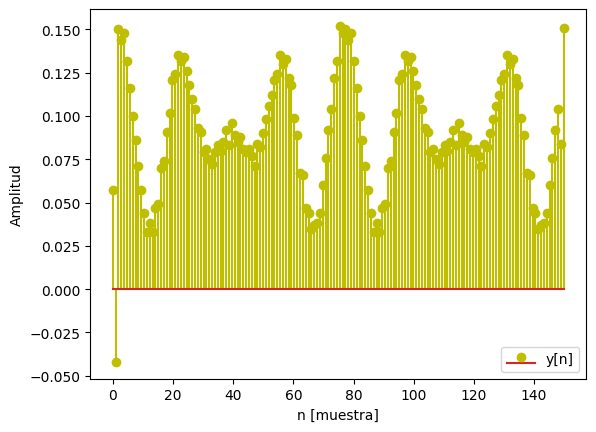

In [ ]:
# Calculo de la respuesta del sistema  mediante la convolucion de la señal cuantizada xq y la respuesta al impulso mostrada antes
y = np.convolve(xq, h, mode='same')  # Se utiliza la convolucion para obtener la respuesta del sistema.
# con 'same' nos aseguramos que la longitud de la señal resultante sea igual a la longitud de la señal mas larga de las dos (xq o h).

# Grafico de la señal resultante
plt.stem(tv, y, 'y', label='y[n]')  # Se grafica la señal resultante utilizando puntos
plt.xlabel('n [muestra]')  # Etiqueta del eje x
plt.legend()
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.show()  # Mostrar la gráfica